# Gauss-Seidel Iteration

In [1]:
using LinearAlgebra
# adopted from gauss_seidel.m
function gs(A,b,tol)
    L = tril(A,-1)
    D = Diagonal(diag(A))
    U = triu(A,+1)
    m = inv(L+D)
    x = b
    for i in 1:1000000
        p = m*(b-U*x)
        n = norm(b-A*p)
        if (n<tol) 
            x = x
            c = i
            return (x,c)
        end
        x = p
    end
    error("Did not converge")
end

gs (generic function with 1 method)

# Problem forumulation

In [2]:
function heatsourceproblem(α,n)
    D2 = zeros(n,n)   # create second derivative matrix
    D2[1,1] = +1
    D2[n,n] = +1
    for i = 2:(n-1)
        D2[i,i-1] = +1
        D2[i,  i] = -2
        D2[i,i+1] = +1
    end
    Q = zeros(n,1)          # create heat source matrix
    spointer = Int(floor(0.3*(n)))     # source pointer
    Q[spointer] = 0.05
    A = D2.*(n-1)^2                     # 1/h² = (n-1)²
    b = - Q./(α/(n-1))
    T, c = gs(A,b,1e-1)
    x = 0:(n-1)
    x = x./x[end]
    return (T,x)
end

heatsourceproblem (generic function with 1 method)

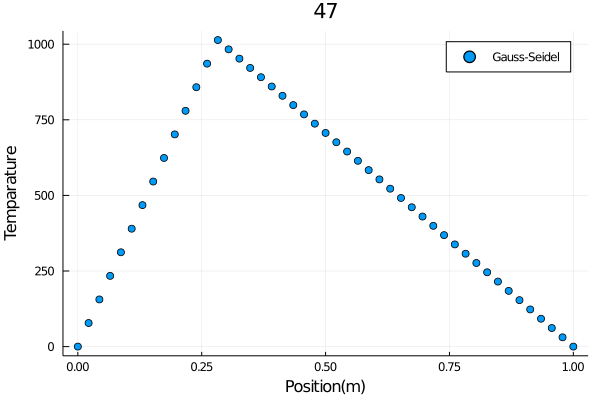

In [3]:
using Plots
n = 47
y, x = heatsourceproblem(1e-5,n)
scatter(x,y, label="Gauss-Seidel", xlabel="Position(m)", 
    ylabel="Temparature", title=n)

## Test for different note count

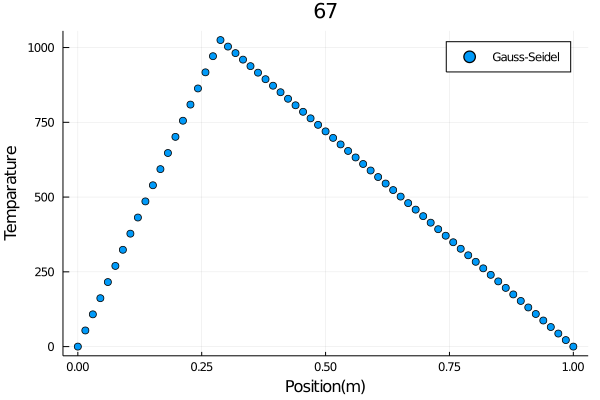

In [4]:
n = 67
y, x = heatsourceproblem(1e-5,n)
scatter(x,y, label="Gauss-Seidel", xlabel="Position(m)", 
    ylabel="Temparature", title=n)

## Adjourn

In [5]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/February/28 21:47"